In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
from keras.layers import Dense 
from keras.models import Sequential


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [ ]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [ ]:

image_size = 784
num_classes = 10 

model = Sequential()

model.add(Dense(128, activation='tanh', input_shape=(image_size,)))
model.add(Dense(128, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train, y_train, batch_size=128, epochs=40, validation_split=0.1)

Epoch 1/40
422/422 [==============================] - 2s 4ms/step - loss: 1.3500 - accuracy: 0.5913 - val_loss: 0.4563 - val_accuracy: 0.8905
Epoch 2/40
422/422 [==============================] - 2s 4ms/step - loss: 0.4837 - accuracy: 0.8684 - val_loss: 0.3377 - val_accuracy: 0.9095
Epoch 3/40
422/422 [==============================] - 2s 4ms/step - loss: 0.3853 - accuracy: 0.8912 - val_loss: 0.2949 - val_accuracy: 0.9195
Epoch 4/40
422/422 [==============================] - 2s 4ms/step - loss: 0.3401 - accuracy: 0.9023 - val_loss: 0.2824 - val_accuracy: 0.9208
Epoch 5/40
422/422 [==============================] - 2s 4ms/step - loss: 0.3234 - accuracy: 0.9061 - val_loss: 0.2560 - val_accuracy: 0.9288
Epoch 6/40
422/422 [==============================] - 2s 4ms/step - loss: 0.2932 - accuracy: 0.9139 - val_loss: 0.2496 - val_accuracy: 0.9300
Epoch 7/40
422/422 [==============================] - 2s 4ms/step - loss: 0.2889 - accuracy: 0.9158 - val_loss: 0.2434 - val_accuracy: 0.9303
Epoch 

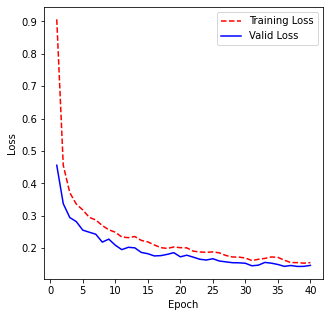

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']


# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
#plt.grid(True)
plt.figure(1,figsize=(5,5))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Valid Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

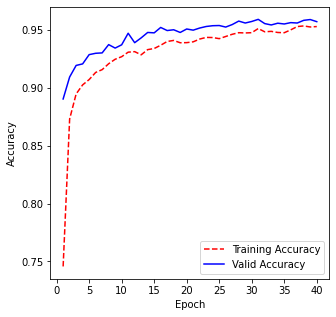

In [ ]:
train_accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(train_accuracy) + 1)

plt.figure(1,figsize=(5,5))
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count,val_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Valid Accuracy'])
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.show();

In [ ]:
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.168
Test accuracy: 0.949
